## Make some graphs

In [2]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from helpers import rolling_average

def load_cached_data(path, saves):
    for save in saves:
        # Load the data
        cached_data = torch.load(path + save, weights_only=False)
        llc_estimates = cached_data['llc_estimates']
        lr = cached_data['lr']
        nbeta = cached_data['nbeta']
        gamma = cached_data['gamma']
        num_chains = cached_data['num_chains']
        num_draws = cached_data['num_draws']
        num_burnin_steps = cached_data['num_burnin_steps']
        num_steps_bw_draws = cached_data['num_steps_bw_draws']
        sampling_method = cached_data['sampling_method']
        train_frac = cached_data['train_frac']
        addition_frac = cached_data['addition_frac']
        training_data_path = cached_data['LOAD_LOCATION']

        training_data = torch.load(training_data_path, weights_only=False)
        train_losses = training_data['train_losses']
        test_losses = training_data['test_losses']
        add_test_losses = training_data['add_test_losses']
        multi_test_losses = training_data['multi_test_losses']

        test_train_multiplier = len(test_losses) // len(llc_estimates)
        add_multi_multiplier = len(add_test_losses) // len(llc_estimates)

        llc_average_window = 4

        train_losses_avg = rolling_average(train_losses, llc_average_window * test_train_multiplier)
        test_losses_avg = rolling_average(test_losses, llc_average_window * test_train_multiplier)
        add_test_losses_avg = rolling_average(add_test_losses, llc_average_window * add_multi_multiplier)
        multi_test_losses_avg = rolling_average(multi_test_losses, llc_average_window * add_multi_multiplier)
        llc_estimates_avg = rolling_average(llc_estimates, llc_average_window)
        
        print(f"addition_frac = {addition_frac} train_frac = {train_frac}")
        #print(f"Estimate created from {training_data_path}")

        epochs_num = len(train_losses)
        test_train_x = np.arange(0, epochs_num, epochs_num // len(train_losses_avg))
        add_multi_x = np.arange(0, epochs_num, epochs_num // len(add_test_losses_avg))
        lc_epochs_x = np.arange(0, epochs_num, epochs_num // len(llc_estimates_avg))
        
        yield {
            'llc_estimates': llc_estimates,
            'lr': lr,
            'nbeta': nbeta,
            'gamma': gamma,
            'num_chains': num_chains,
            'num_draws': num_draws,
            'num_burnin_steps': num_burnin_steps,
            'num_steps_bw_draws': num_steps_bw_draws,
            'sampling_method': sampling_method,
            'train_frac': train_frac,
            'addition_frac': addition_frac,
            'training_data_path': training_data_path,
            'train_losses_avg': train_losses_avg,
            'test_losses_avg': test_losses_avg,
            'add_test_losses_avg': add_test_losses_avg,
            'multi_test_losses_avg': multi_test_losses_avg,
            'llc_estimates_avg': llc_estimates_avg,
            'test_train_x': test_train_x,
            'add_multi_x': add_multi_x,
            'lc_epochs_x': lc_epochs_x,
        }

# Path to the saved data
path = "../saves/check_point_50/"

#### Make individual graphs

addition_frac = 0.3 train_frac = 0.5
addition_frac = 0.3 train_frac = 0.5 len(llc_estimates) = 120
Estimate created from ../saves/check_point_50/grokking_add_multi_0.3.pth


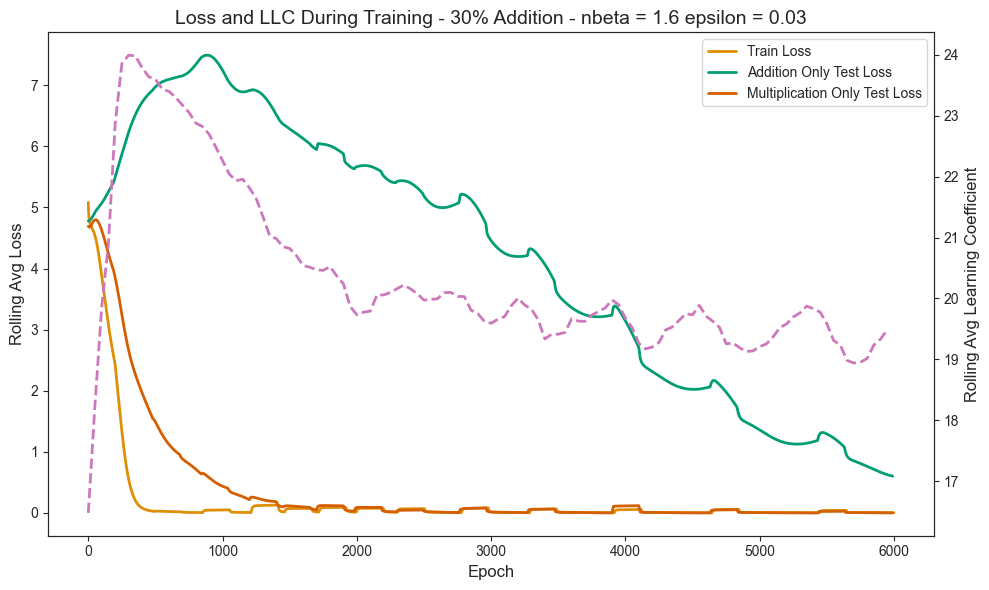

addition_frac = 0.35 train_frac = 0.5
addition_frac = 0.35 train_frac = 0.5 len(llc_estimates) = 120
Estimate created from ../saves/check_point_50/grokking_add_multi_0.35.pth


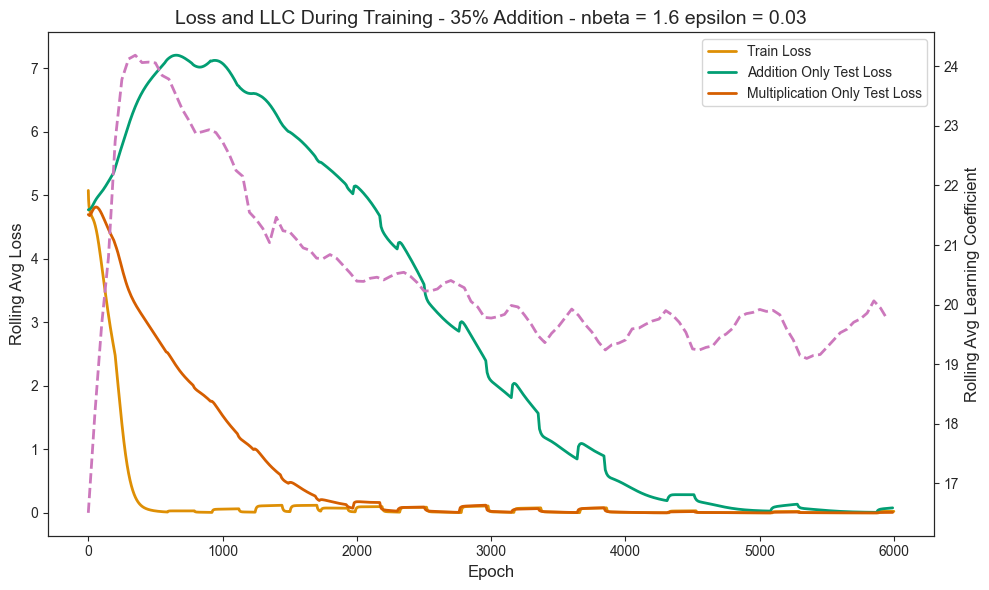

addition_frac = 0.4 train_frac = 0.5
addition_frac = 0.4 train_frac = 0.5 len(llc_estimates) = 120
Estimate created from ../saves/check_point_50/grokking_add_multi_0.4.pth


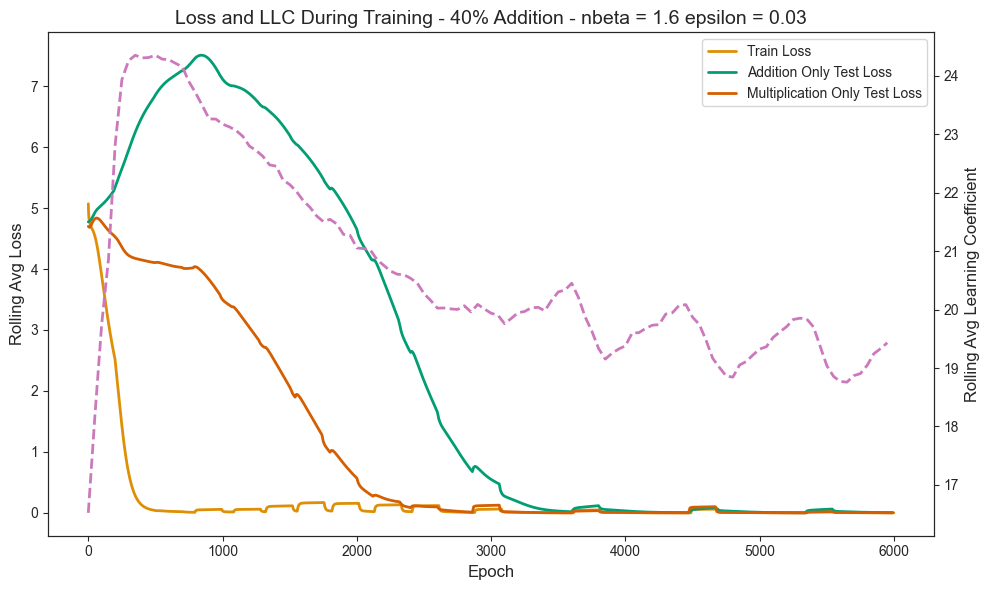

addition_frac = 0.45 train_frac = 0.5
addition_frac = 0.45 train_frac = 0.5 len(llc_estimates) = 120
Estimate created from ../saves/check_point_50/grokking_add_multi_0.45.pth


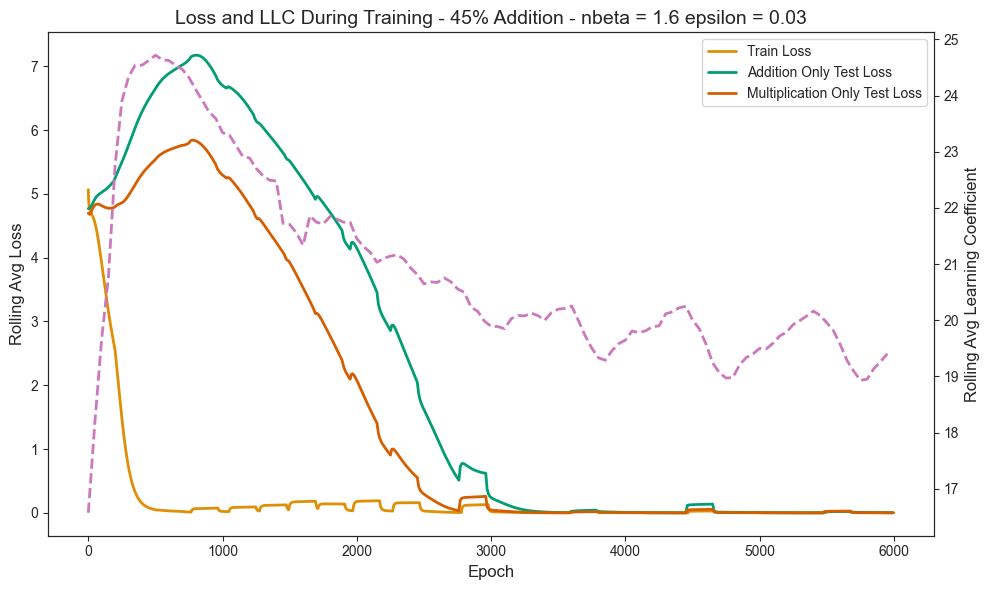

addition_frac = 0.5 train_frac = 0.5
addition_frac = 0.5 train_frac = 0.5 len(llc_estimates) = 120
Estimate created from ../saves/check_point_50/grokking_add_multi_0.5.pth


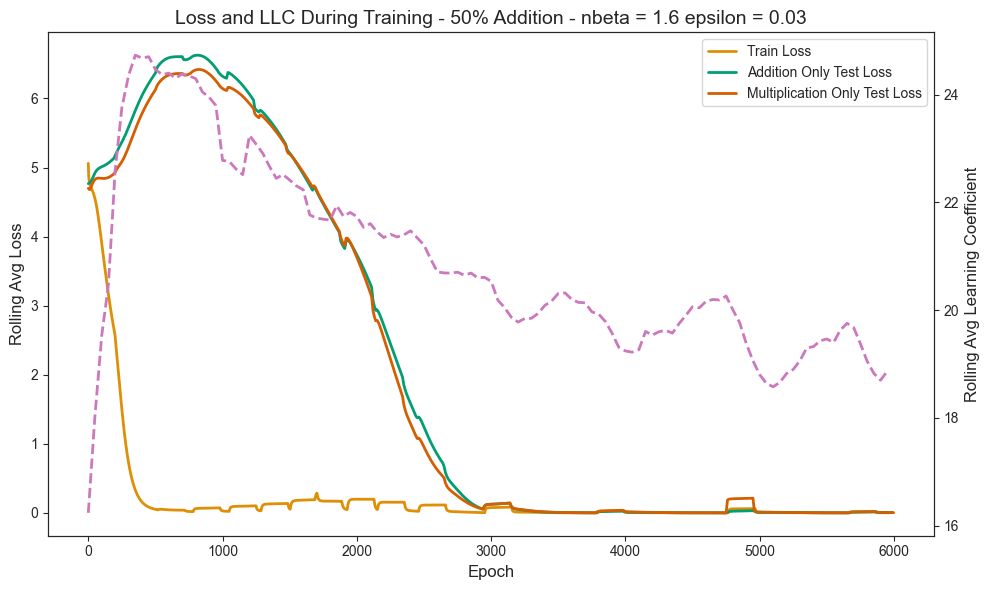

addition_frac = 0.55 train_frac = 0.5
addition_frac = 0.55 train_frac = 0.5 len(llc_estimates) = 120
Estimate created from ../saves/check_point_50/grokking_add_multi_0.55.pth


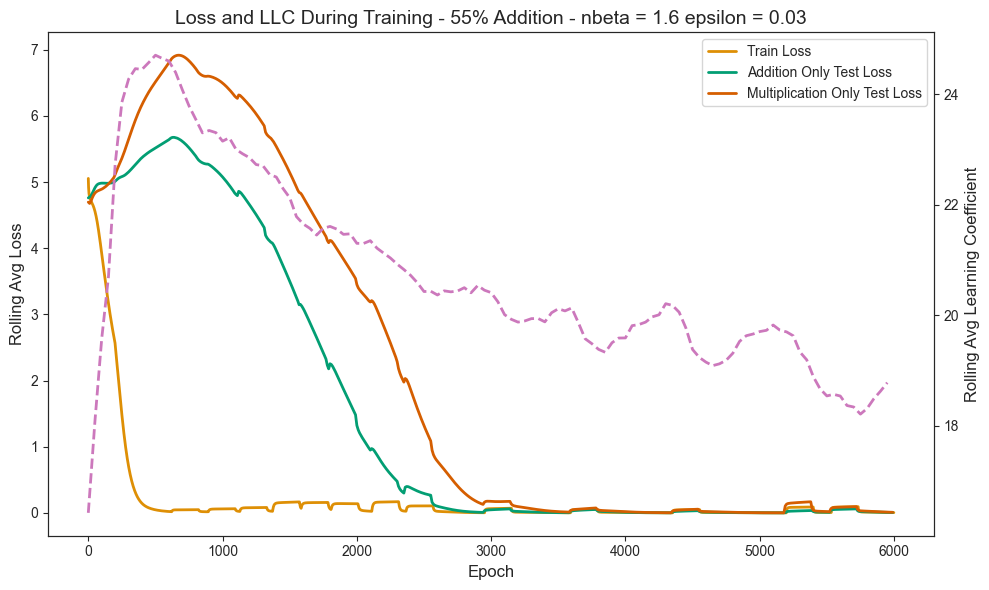

addition_frac = 0.6 train_frac = 0.5
addition_frac = 0.6 train_frac = 0.5 len(llc_estimates) = 120
Estimate created from ../saves/check_point_50/grokking_add_multi_0.6.pth


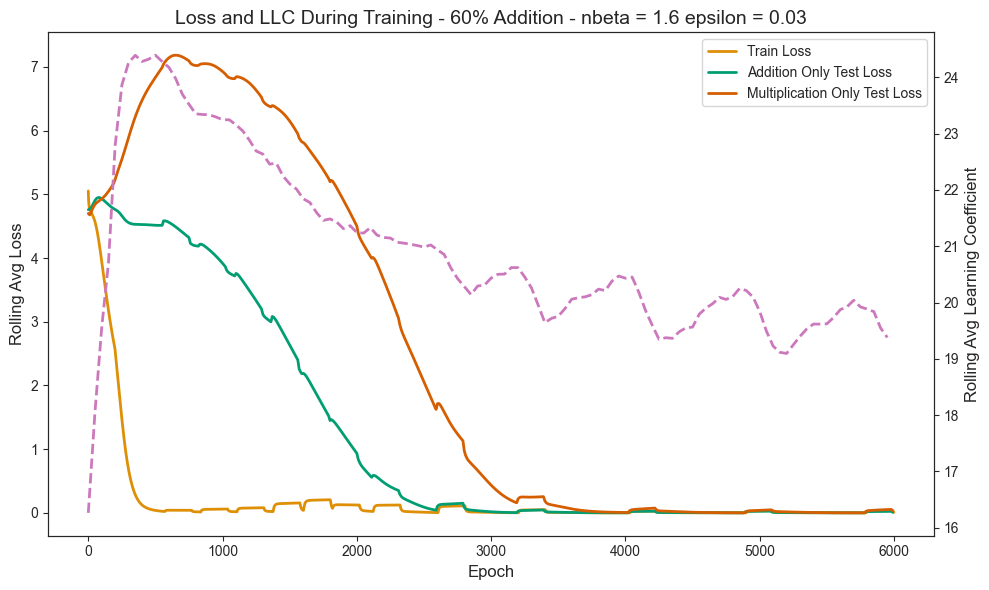

addition_frac = 0.65 train_frac = 0.5
addition_frac = 0.65 train_frac = 0.5 len(llc_estimates) = 120
Estimate created from ../saves/check_point_50/grokking_add_multi_0.65.pth


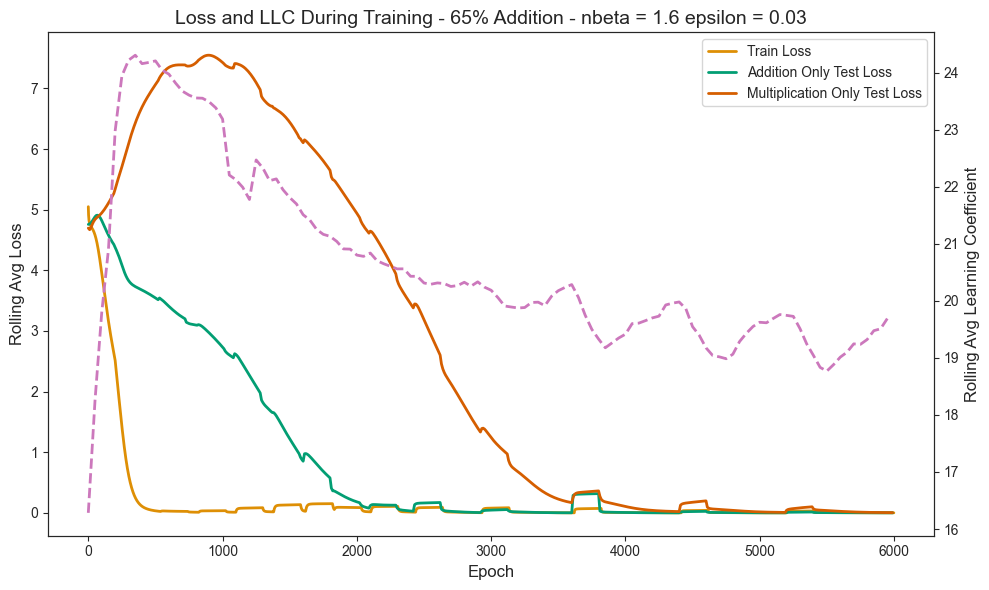

addition_frac = 0.7 train_frac = 0.5
addition_frac = 0.7 train_frac = 0.5 len(llc_estimates) = 120
Estimate created from ../saves/check_point_50/grokking_add_multi_0.7.pth


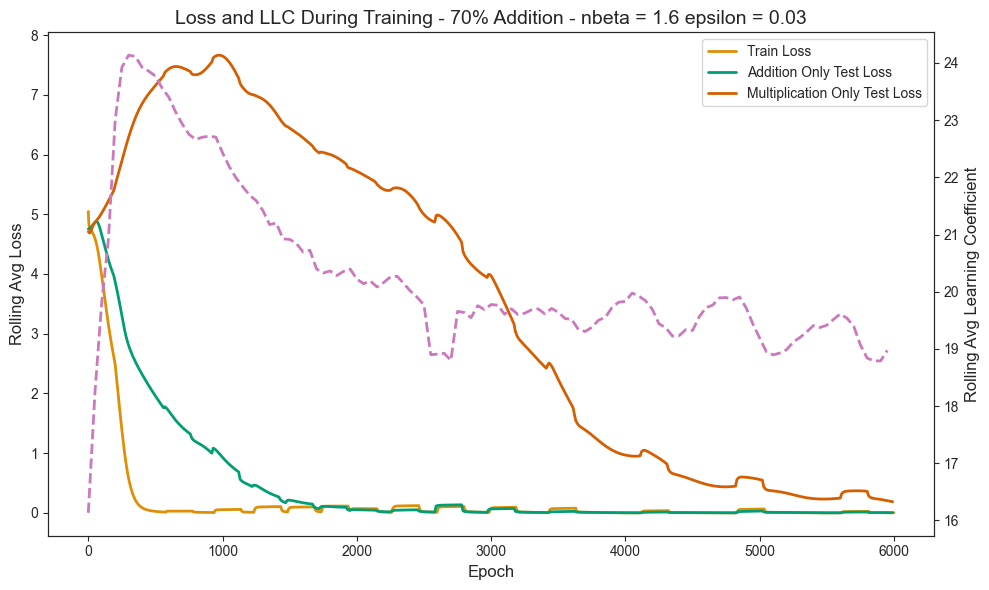

In [5]:
saves = [
    "llc_estimates_0.3.pth",
    "llc_estimates_0.35.pth",
    "llc_estimates_0.4.pth",
    "llc_estimates_0.45.pth",
    "llc_estimates_0.5.pth",
    "llc_estimates_0.55.pth",
    "llc_estimates_0.6.pth",
    "llc_estimates_0.65.pth",
    "llc_estimates_0.7.pth",
]

# Make individual graphs
for data in load_cached_data(path, saves):
    # Process the data
    llc_estimates = data['llc_estimates']
    lr = data['lr']
    nbeta = data['nbeta']
    gamma = data['gamma']
    num_chains = data['num_chains']
    num_draws = data['num_draws']
    num_burnin_steps = data['num_burnin_steps']
    num_steps_bw_draws = data['num_steps_bw_draws']
    sampling_method = data['sampling_method']
    train_frac = data['train_frac']
    addition_frac = data['addition_frac']
    training_data_path = data['training_data_path']
    train_losses_avg = data['train_losses_avg']
    test_losses_avg = data['test_losses_avg']
    add_test_losses_avg = data['add_test_losses_avg']
    multi_test_losses_avg = data['multi_test_losses_avg']
    llc_estimates_avg = data['llc_estimates_avg']
    test_train_x = data['test_train_x']
    add_multi_x = data['add_multi_x']
    lc_epochs_x = data['lc_epochs_x']

    print(f"addition_frac = {addition_frac} train_frac = {train_frac} len(llc_estimates) = {len(llc_estimates)}")
    print(f"Estimate created from {training_data_path}")    

    # Set up the plot
    plt.figure(figsize=(10, 6))
    sns.set_style("ticks")

    # Create the main axis
    ax1 = plt.gca()

    colors = sns.color_palette("colorblind")

    # Plot loss curves
    # ax1.plot(test_train_x, test_losses_avg, color=colors[0], label='Test Loss', linewidth=2)
    ax1.plot(test_train_x, train_losses_avg, color=colors[1], label='Train Loss', linewidth=2)
    ax1.plot(add_multi_x, add_test_losses_avg, color=colors[2], label='Addition Only Test Loss', linewidth=2)
    ax1.plot(add_multi_x, multi_test_losses_avg, color=colors[3], label='Multiplication Only Test Loss', linewidth=2)

    # Set up the second y-axis for learning coefficient
    ax2 = ax1.twinx()
    ax2.plot(lc_epochs_x, llc_estimates_avg, color=colors[4], linestyle='--', linewidth=2)

    # Customize the plot
    ax1.set_xlabel('Epoch', fontsize=12)
    ax1.set_ylabel('Rolling Avg Loss', fontsize=12)
    ax2.set_ylabel('Rolling Avg Learning Coefficient', fontsize=12)
    plt.title(f"Loss and LLC During Training - {addition_frac*100:.0f}% Addition - nbeta = {nbeta} epsilon = {lr}", fontsize=14)

    # Adjust tick parameters
    ax1.tick_params(axis='both', which='major', labelsize=10)
    ax2.tick_params(axis='y', which='major', labelsize=10)

    # Create a combined legend
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right') # bbox_to_anchor=(1.1, 1), fontsize=10)

    plt.tight_layout()

    # Save the plot to a PNG file
    plt.savefig(f'../graphs/loss_llc_training_{addition_frac}.png', format='png', dpi=300)
    plt.show()

#### Make side by side graphs

addition_frac = 0.5 train_frac = 0.5
addition_frac = 0.6 train_frac = 0.5
addition_frac = 0.7 train_frac = 0.5
addition_frac = 0.5 train_frac = 0.5 len(llc_estimates) = 120
Estimate created from ../saves/check_point_50/grokking_add_multi_0.5.pth
addition_frac = 0.6 train_frac = 0.5 len(llc_estimates) = 120
Estimate created from ../saves/check_point_50/grokking_add_multi_0.6.pth
addition_frac = 0.7 train_frac = 0.5 len(llc_estimates) = 120
Estimate created from ../saves/check_point_50/grokking_add_multi_0.7.pth


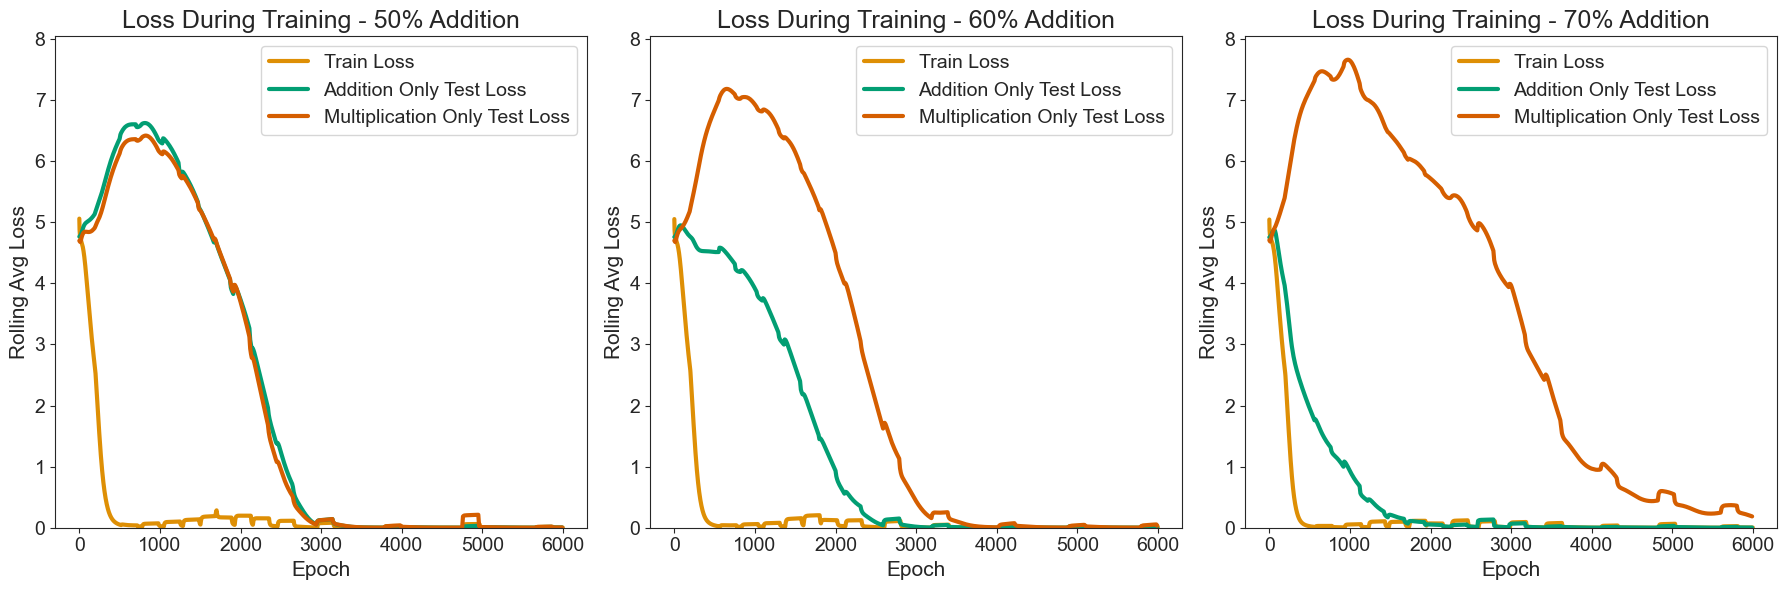

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

saves = [
    "llc_estimates_0.5.pth",
    "llc_estimates_0.6.pth",
    "llc_estimates_0.7.pth",
]

sns.set_style("ticks")

# Create a figure with 3 subplots side by side
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Load the datasets
datasets = list(load_cached_data(path, saves))

# Find the maximum loss for any of the datasets
max_loss = 0
for data in datasets:
    max_loss = max(max_loss, max(data['train_losses_avg']), max(data['add_test_losses_avg']), max(data['multi_test_losses_avg']))

max_loss = max_loss * 1.05

def create_plot(ax, data, max_loss):
    # Process the data
    llc_estimates = data['llc_estimates']
    train_frac = data['train_frac']
    addition_frac = data['addition_frac']
    training_data_path = data['training_data_path']
    train_losses_avg = data['train_losses_avg']
    add_test_losses_avg = data['add_test_losses_avg']
    multi_test_losses_avg = data['multi_test_losses_avg']
    test_train_x = data['test_train_x']
    add_multi_x = data['add_multi_x']

    print(f"addition_frac = {addition_frac} train_frac = {train_frac} len(llc_estimates) = {len(llc_estimates)}")
    print(f"Estimate created from {training_data_path}")

    colors = sns.color_palette("colorblind")
    
    # Plot loss curves
    ax.plot(test_train_x, train_losses_avg, color=colors[1], label='Train Loss', linewidth=3)
    ax.plot(add_multi_x, add_test_losses_avg, color=colors[2], label='Addition Only Test Loss', linewidth=3)
    ax.plot(add_multi_x, multi_test_losses_avg, color=colors[3], label='Multiplication Only Test Loss', linewidth=3)
    
    # Customize the plot
    ax.set_xlabel('Epoch', fontsize=15)
    ax.set_ylabel('Rolling Avg Loss', fontsize=15)
    ax.set_title(f"Loss During Training - {addition_frac*100:.0f}% Addition", fontsize=18)

    # Set y-axis limit
    ax.set_ylim(0, max_loss)

    # Adjust tick parameters
    ax.tick_params(axis='both', which='major', labelsize=14)
    
    # Create a combined legend
    ax.legend(loc='upper right', fontsize=14)

# Create each subplot
for i, (ax, data) in enumerate(zip([ax1, ax2, ax3], datasets[:3])):
    create_plot(ax, data, max_loss)

plt.tight_layout()
plt.savefig('../graphs/combined_loss_llc_training.png', format='png', dpi=300)
plt.show()

#### Make LLC comparison graph

addition_frac = 0.3 train_frac = 0.5
addition_frac = 0.35 train_frac = 0.5
addition_frac = 0.4 train_frac = 0.5
addition_frac = 0.45 train_frac = 0.5
addition_frac = 0.5 train_frac = 0.5
addition_frac = 0.55 train_frac = 0.5
addition_frac = 0.6 train_frac = 0.5
addition_frac = 0.65 train_frac = 0.5
addition_frac = 0.7 train_frac = 0.5


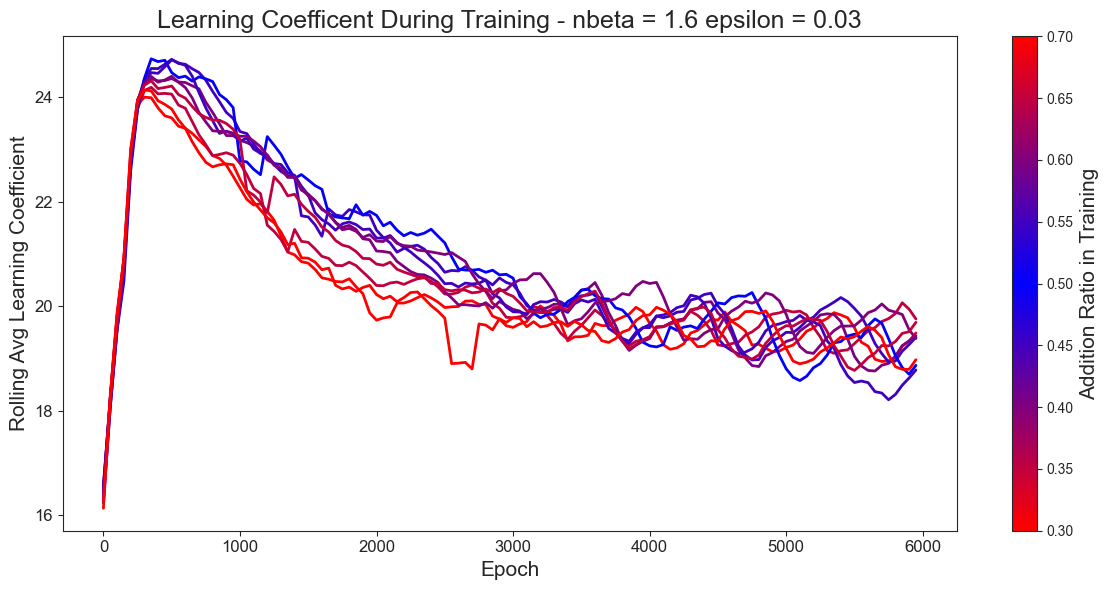

In [23]:
from matplotlib.colors import LinearSegmentedColormap

saves = [
    "llc_estimates_0.3.pth",
    "llc_estimates_0.35.pth",
    "llc_estimates_0.4.pth",
    "llc_estimates_0.45.pth",
    "llc_estimates_0.5.pth",
    "llc_estimates_0.55.pth",
    "llc_estimates_0.6.pth",
    "llc_estimates_0.65.pth",
    "llc_estimates_0.7.pth",
]

# Create a custom diverging colormap
colors = ['red', 'blue', 'red']
n_bins = 100  # Number of discrete color levels
cmap = LinearSegmentedColormap.from_list('custom_diverging', colors, N=n_bins)

data_list = list(load_cached_data(path, saves))

addition_fracs = [data['addition_frac'] for data in data_list]
min_addition_frac = min(addition_fracs)
max_addition_frac = max(addition_fracs)

# Set up the plot
plt.figure(figsize=(12, 6))
sns.set_style("ticks")

# Create the main axis
ax1 = plt.gca()

# Generate colors
norm = Normalize(vmin=min_addition_frac, vmax=max_addition_frac)
# cmap = plt.get_cmap('inferno')
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Plot llc_estimates_avg lines with different shades
for data in data_list:
    llc_estimates_avg = data['llc_estimates_avg']
    addition_frac = data['addition_frac']
    lc_epochs_x = data['lc_epochs_x']
    nbeta = data['nbeta']
    epsilon = data['lr']

    color = cmap(norm(addition_frac))
    ax1.plot(lc_epochs_x, llc_estimates_avg, color=color, label=f'Addition Frac: {addition_frac:.2f}', linewidth=2)

# Customize the plot
ax1.set_xlabel('Epoch', fontsize=15)
ax1.set_ylabel('Rolling Avg Learning Coefficient', fontsize=15)
ax1.tick_params(axis='both', which='major', labelsize=12)
plt.title(f'Learning Coefficent During Training - nbeta = {nbeta} epsilon = {epsilon}', fontsize=18)

# Create a vertical legend
cbar = plt.colorbar(sm, ax=ax1, orientation='vertical')
cbar.set_label('Addition Ratio in Training', fontsize=15)

plt.savefig(f'../graphs/llc_during_training_all.png', format='png', dpi=300)
plt.tight_layout()
plt.show()

#### Make addition and addition + multiplication side by side graph

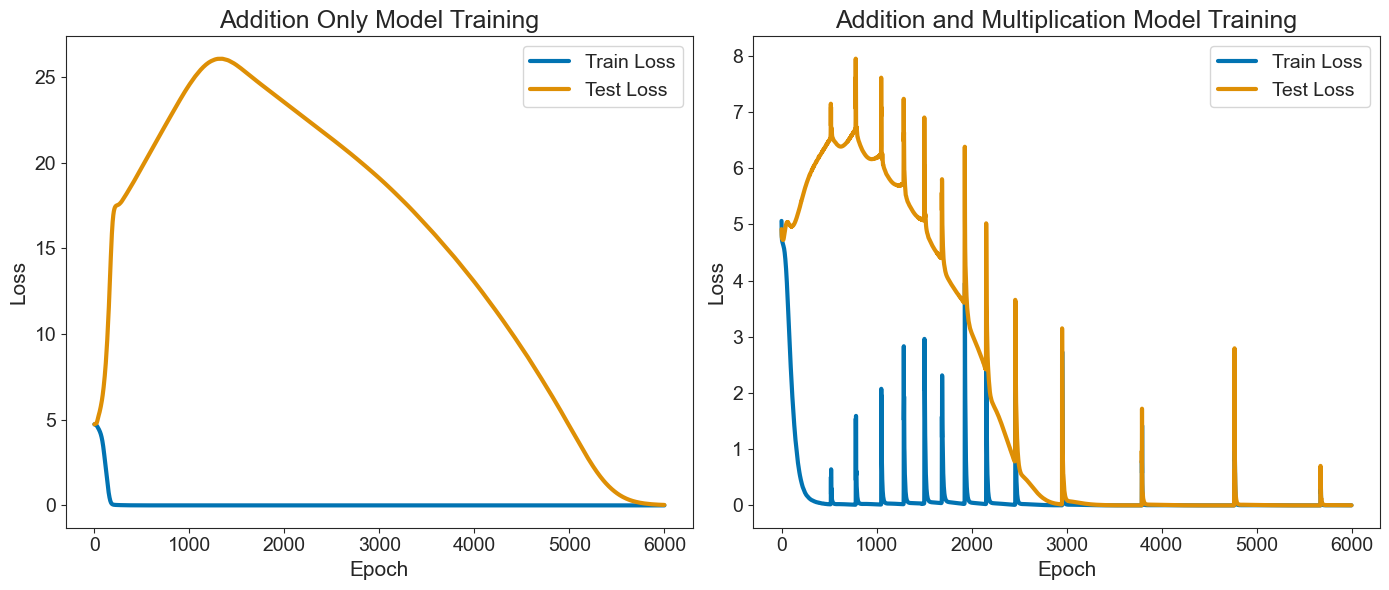

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("ticks")

# Create a figure with 3 subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

def create_plot(ax, data):
    # Process the data
    train_losses = data['train_losses']
    test_losses = data['test_losses']

    epochs = range(0, len(train_losses))

    colors = sns.color_palette("colorblind")
    
    # Plot loss curves
    ax.plot(epochs, train_losses, color=colors[0], label='Train Loss', linewidth=3)
    ax.plot(epochs, test_losses, color=colors[1], label='Test Loss', linewidth=3)
    
    # Customize the plot
    ax.set_xlabel('Epoch', fontsize=15)
    ax.set_ylabel('Loss', fontsize=15)

    # Adjust tick parameters
    ax.tick_params(axis='both', which='major', labelsize=14)
    
    # Create a combined legend
    ax.legend(loc='upper right', fontsize=14)

addition_data = torch.load(path + "grokking_addition.pth", weights_only=False)
add_multi_data = torch.load(path + "grokking_add_multi_0.5.pth", weights_only=False)

create_plot(ax1, addition_data)
ax1.set_title(f"Addition Only Model Training", fontsize=18)

create_plot(ax2, add_multi_data)
ax2.set_title(f"Addition and Multiplication Model Training", fontsize=18)

plt.tight_layout()
plt.savefig('../graphs/addition_only_compare.png', format='png', dpi=300)
plt.show()